# ♚ Hello Chess ♛

Created by Nate Solon.
Email: nate.solon@gmail.com

## Purpose 👊

This notebook will show you how to get started with using data to analyze chess. By the end you will be able to:

*   Download the chess games of any player
*   Play through the moves
*   Use a chess engine to analyze positions

Let's go! 🚀

## Get Games ⛳️

First you'll use the lichess API to download some games. [Lichess](https://lichess.org/) is the second-biggest online chess server in the world. It's free and open source.



In [1]:
pip install chess python-lichess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.9 MB/s eta 0:00:00


In [2]:
import lichess.api
from lichess.format import SINGLE_PGN

You can download the games of any player provided you know their username. Maybe you'd like to check your own games... or a potential opponent?

Let's get the latest game from Magnus Carlsen, the World Chess Champion, whose username happens to be DrNykterstein. "Nykter" is Norwegian for "sober"... 🤔

In [3]:
user = "DrNykterstein" # Magnus Carlsen! You can change this to any lichess user.

Chess games are often stored in PGN format, which is just a text file with information about the game and the moves.

In [12]:
pgn = lichess.api.user_games(user, max=1, format=SINGLE_PGN)
print(pgn)

[Event "Titled Arena Jun '24"]
[Site "https://lichess.org/apzXqc2m"]
[Date "2024.06.22"]
[White "jonasbjerre"]
[Black "DrNykterstein"]
[Result "0-1"]
[UTCDate "2024.06.22"]
[UTCTime "19:10:33"]
[WhiteElo "2892"]
[BlackElo "3018"]
[WhiteRatingDiff "-4"]
[BlackRatingDiff "+10"]
[WhiteTitle "GM"]
[BlackTitle "GM"]
[Variant "Standard"]
[TimeControl "60+0"]
[ECO "B10"]
[Termination "Normal"]

1. e4 c6 2. Nc3 d5 3. Nf3 dxe4 4. Nxe4 Nf6 5. Ng3 h5 6. h3 h4 7. Ne2 e5 8. Nxe5 Bd6 9. Nf3 O-O 10. d3 Re8 11. Be3 Nd5 12. Qd2 Nxe3 13. fxe3 a5 14. O-O-O a4 15. a3 b5 16. Kb1 b4 17. axb4 a3 18. b3 a2+ 19. Ka1 Na6 20. c3 Qf6 21. Ned4 c5 22. bxc5 Nxc5 23. b4 Na4 24. e4 Bf4 25. Qc2 Bd7 26. Qb3 Rec8 27. Ne2 Nxc3 28. e5 Bxe5 29. Nxe5 Qxe5 30. d4 Qe3 31. Nxc3 Rxc3 32. Qb2 Rb3 33. Qc2 Rb1+ 34. Rxb1 axb1=Q+ 35. Kxb1 Bf5 36. Qxf5 Qb3+ 37. Kc1 Qc3+ 38. Kd1 Ra1+ 39. Ke2 Re1+ 40. Kf2 Qe3# 0-1





Experienced chess players can read the moves by sight, but it's no problem if you can't. In the next section you'll use the `python-chess` library to read the game. For now, let's save our pgn.

In [5]:
with open("magnus.pgn", "w") as f:
  f.write(pgn)

## Read Games 🤓

In this section you'll use the [pgn module](https://python-chess.readthedocs.io/en/latest/pgn.html) of python-chess to open and read a pgn file.

In [6]:
import chess
import chess.pgn

In [7]:
pgn = open("magnus.pgn")
game = chess.pgn.read_game(pgn)

You can see the current board position right in the notebook!

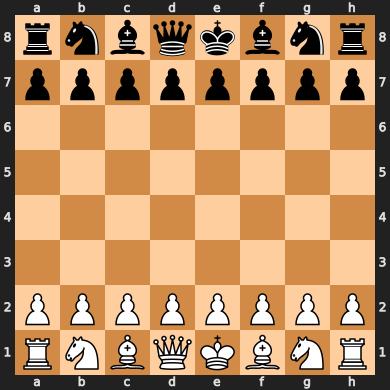

In [8]:
board = game.board()
board

Nice! But this is just the starting position, not very interesting. Let's make some moves...

In [9]:
for i, move in enumerate(game.mainline_moves()):
    board.push(move)
    if i == 20:
        break

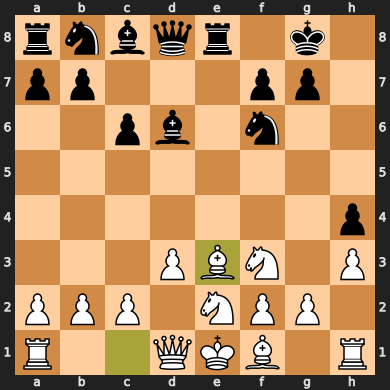

In [10]:
board

Looks like a tense middlegame! Who's winning? If only you could ask a chess master...

## Analyze Games 🧐

In this section you'll use [Stockfish](https://stockfishchess.org/), the current strongest chess engine in the world, to analyze a position.

First you need to download Stockfish. If you're running this notebook on Colab, the command below will work. If running locally, [you can download the appropriate version of Stockfish](https://stockfishchess.org/download/).

In [16]:
! wget https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-sse41-popcnt.tar

--2024-10-01 07:15:06--  https://github.com/official-stockfish/Stockfish/releases/latest/download/stockfish-ubuntu-x86-64-sse41-popcnt.tar
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/official-stockfish/Stockfish/releases/download/sf_17/stockfish-ubuntu-x86-64-sse41-popcnt.tar [following]
--2024-10-01 07:15:06--  https://github.com/official-stockfish/Stockfish/releases/download/sf_17/stockfish-ubuntu-x86-64-sse41-popcnt.tar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/20976138/9a27337c-3507-4f41-84f4-92199c4cb1d9?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20241001%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20241001T071506Z&X-Amz-Expires=300&X-Amz-Signature=4f4a587819

In [17]:
# prompt: !unzip stockfish

!tar -xf stockfish-ubuntu-x86-64-sse41-popcnt.tar


In [18]:
import chess.engine

`python-chess` has an [engine module](https://python-chess.readthedocs.io/en/latest/engine.html) as well. How convenient! To connect to the engine, all you need is the location of the Stockfish executable.

In [19]:
engine = chess.engine.SimpleEngine.popen_uci("/content/stockfish/stockfish-ubuntu-x86-64-sse41-popcnt")

Let's instruct the engine to analyze the current position for 1 second.

In [20]:
info = engine.analyse(board, chess.engine.Limit(time=1))
info

{'string': 'NNUE evaluation using nn-37f18f62d772.nnue (6MiB, (22528, 128, 15, 32, 1))',
 'depth': 20,
 'seldepth': 18,
 'multipv': 1,
 'score': PovScore(Cp(+83), BLACK),
 'nodes': 358414,
 'nps': 358055,
 'hashfull': 129,
 'tbhits': 0,
 'time': 1.001,
 'pv': [Move.from_uci('f6d5')],
 'lowerbound': True}

This is a little confusing, but for the moment all you need is the score. This represents who's winning in the current position.

In [21]:
info['score'].pov(chess.WHITE)

Cp(-83)

Cp means centipawns. 100 centipawns = 1 pawn. So according to the engine, from White's pov (point of view) the evaluation is +68. White is ahead by a little less than a pawn. It seems Magnus has the upper hand.

## Conclusion 🎬

You now know how to download games, play through the moves, and analyze positions with a chess engine. What will you do with all this power??

## Credits

1. [Lichess](https://lichess.org/)
2. [python-lichess](https://python-lichess.readthedocs.io/en/latest/)
3. [python-chess](https://python-chess.readthedocs.io/en/latest/index.html)
4. [Stockfish](https://stockfishchess.org/)